## The data flow for the analysis and visualization used in the `Developer` tab for the [Nintendo app](https://nintendo.streamlit.app/)<br>
#### (22-08-2025)
-------------

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('deku_detailed_df.csv')
print(df.columns)
print(df.describe())
df

Index(['game_id', 'msrp_price', 'switch_date', 'genres', 'offline_players',
       'local_wireless', 'online_players', 'developer', 'publisher',
       'download_size', 'meta_critic', 'user_score', 'opencritic_score',
       'hltb_hours', 'usk_rating', 'play_modes', 'languages', 'platforms'],
      dtype='object')
       opencritic_score    usk_rating
count       4317.000000  16877.000000
mean          71.385916      7.270605
std           10.324295      6.163189
min           17.000000      0.000000
25%           66.000000      0.000000
50%           73.000000      6.000000
75%           78.000000     12.000000
max           97.000000     18.000000


,game_id,msrp_price,switch_date,genres,offline_players,local_wireless,online_players,developer,publisher,download_size,meta_critic,user_score,opencritic_score,hltb_hours,usk_rating,play_modes,languages,platforms
0,snowrunner,"€39,99","May 18, 2021",Simulation; Racing; Multiplayer,1,2 - 4,1 - 4,Saber Interactive,Focus Entertainment,13.644 GB,75,7.1,80.0,main_story=89.0; main_plus_extra=159.5; comple...,0.0,"TV, Tabletop, Handheld","English, Portuguese, Spanish, French, German, ...","Nintendo Switch, PlayStation 5, PlayStation 4,..."
1,shakedown-hawaii,"€19,99","May 7, 2019",Action; Adventure; Arcade,1,NaN,NaN,Vblank Entertainment,Vblank Entertainment,173 MB,75,7.1,74.0,main_story=6.5; main_plus_extra=10.0; completi...,16.0,"TV, Tabletop, Handheld",English,"Nintendo Switch, PlayStation 5, PlayStation 4,..."
2,alwas-awakening,"€9,99","September 27, 2018",Platformer; Adventure,1,NaN,NaN,Elden Pixels,Elden Pixels,293 MB,75,7.1,72.0,main_story=7.5; main_plus_extra=9.5; completio...,6.0,"TV, Tabletop, Handheld","English, French, Portuguese, Spanish, German, ...","Nintendo Switch, PlayStation 4, Xbox One, Steam"
3,de-blob-2,"€29,99","August 28, 2018",Platformer,1 - 2,NaN,NaN,Blue Tongue Entertainment; Blitworks,THQ Nordic,3.189 GB,75,7.1,71.0,main_story=11.0; main_plus_extra=18.0; complet...,6.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam"
4,wild-hearts-s,"€49,99","July 25, 2025",Action; Adventure; Role-Playing,1,1 - 4,1 - 4,NaN,KOEI TECMO AMERICA,33.442 GB,75,7.1,78.0,NaN,12.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, Portuguese, French...",Nintendo Switch 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,sky-oceans-wings-for-hire,"€24,99","October 10, 2024",Adventure; Strategy; Action; Role-Playing,1,NaN,NaN,Octeto Studios,PQube,5.387 GB,56,tbd,47.0,main_story=9.0; main_plus_extra=16.5,12.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, Ch...","Nintendo Switch, PlayStation 5, Xbox Series X|..."
22011,epic-chef,"€24,99","November 11, 2021",Adventure; Simulation,1,NaN,NaN,Infinigon Games,Team17,3.924 GB,56,tbd,71.0,main_story=32.0; main_plus_extra=52.0; complet...,6.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam"
22012,think-of-the-children,"€12,99",NaN,Party; Action; Multiplayer,1 - 4,NaN,NaN,Jammed Up Studios,Fellow Traveller,613 MB,56,tbd,NaN,main_story=3.0; main_plus_extra=6.0,6.0,"TV, Tabletop, Handheld",English,"Nintendo Switch, PlayStation 4, Xbox One, Steam"
22013,tears-of-avia,"€14,99","October 14, 2021",Role-Playing; Strategy,1,NaN,NaN,CooCooSqueaky Games,PQube,6.094 GB,56,tbd,51.0,main_story=9.5; completionist=26.0,12.0,"TV, Tabletop, Handheld","Japanese, English, French, German, Russian, Ch...","Nintendo Switch, PlayStation 4, Xbox One, Steam"


## Data curation

### 1. Split `hltb_hour` into three numeric columns

In [29]:
# Function to extract values
def parse_hltb_hours(x):
    if pd.isna(x): 
        return pd.Series([np.nan, np.nan, np.nan])
    
    parts = dict(item.split('=') for item in x.split('; '))
    main_story = float(parts.get('main_story', np.nan))
    main_plus_extra = float(parts.get('main_plus_extra', np.nan))
    completionist = float(parts.get('completionist', np.nan))
    
    return pd.Series([main_story, main_plus_extra, completionist])

# Apply to dataframe
df[['hltb_main_story', 'hltb_main_plus_extra', 'hltb_completionist']] = df['hltb_hours'].apply(parse_hltb_hours)
df

,game_id,msrp_price,switch_date,genres,offline_players,local_wireless,online_players,developer,publisher,download_size,...,user_score,opencritic_score,hltb_hours,usk_rating,play_modes,languages,platforms,hltb_main_story,hltb_main_plus_extra,hltb_completionist
0,snowrunner,"€39,99","May 18, 2021",Simulation; Racing; Multiplayer,1,2 - 4,1 - 4,Saber Interactive,Focus Entertainment,13.644 GB,...,7.1,80.0,main_story=89.0; main_plus_extra=159.5; comple...,0.0,"TV, Tabletop, Handheld","English, Portuguese, Spanish, French, German, ...","Nintendo Switch, PlayStation 5, PlayStation 4,...",89.0,159.5,236.0
1,shakedown-hawaii,"€19,99","May 7, 2019",Action; Adventure; Arcade,1,NaN,NaN,Vblank Entertainment,Vblank Entertainment,173 MB,...,7.1,74.0,main_story=6.5; main_plus_extra=10.0; completi...,16.0,"TV, Tabletop, Handheld",English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",6.5,10.0,15.0
2,alwas-awakening,"€9,99","September 27, 2018",Platformer; Adventure,1,NaN,NaN,Elden Pixels,Elden Pixels,293 MB,...,7.1,72.0,main_story=7.5; main_plus_extra=9.5; completio...,6.0,"TV, Tabletop, Handheld","English, French, Portuguese, Spanish, German, ...","Nintendo Switch, PlayStation 4, Xbox One, Steam",7.5,9.5,10.5
3,de-blob-2,"€29,99","August 28, 2018",Platformer,1 - 2,NaN,NaN,Blue Tongue Entertainment; Blitworks,THQ Nordic,3.189 GB,...,7.1,71.0,main_story=11.0; main_plus_extra=18.0; complet...,6.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam",11.0,18.0,24.5
4,wild-hearts-s,"€49,99","July 25, 2025",Action; Adventure; Role-Playing,1,1 - 4,1 - 4,NaN,KOEI TECMO AMERICA,33.442 GB,...,7.1,78.0,NaN,12.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, Portuguese, French...",Nintendo Switch 2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,sky-oceans-wings-for-hire,"€24,99","October 10, 2024",Adventure; Strategy; Action; Role-Playing,1,NaN,NaN,Octeto Studios,PQube,5.387 GB,...,tbd,47.0,main_story=9.0; main_plus_extra=16.5,12.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, Ch...","Nintendo Switch, PlayStation 5, Xbox Series X|...",9.0,16.5,NaN
22011,epic-chef,"€24,99","November 11, 2021",Adventure; Simulation,1,NaN,NaN,Infinigon Games,Team17,3.924 GB,...,tbd,71.0,main_story=32.0; main_plus_extra=52.0; complet...,6.0,"TV, Tabletop, Handheld","Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam",32.0,52.0,54.0
22012,think-of-the-children,"€12,99",NaN,Party; Action; Multiplayer,1 - 4,NaN,NaN,Jammed Up Studios,Fellow Traveller,613 MB,...,tbd,NaN,main_story=3.0; main_plus_extra=6.0,6.0,"TV, Tabletop, Handheld",English,"Nintendo Switch, PlayStation 4, Xbox One, Steam",3.0,6.0,NaN
22013,tears-of-avia,"€14,99","October 14, 2021",Role-Playing; Strategy,1,NaN,NaN,CooCooSqueaky Games,PQube,6.094 GB,...,tbd,51.0,main_story=9.5; completionist=26.0,12.0,"TV, Tabletop, Handheld","Japanese, English, French, German, Russian, Ch...","Nintendo Switch, PlayStation 4, Xbox One, Steam",9.5,NaN,26.0


### 2. Clean Data

In [30]:
def clean_price(x):
    if pd.isna(x): return np.nan
    x = x.strip()
    if x.lower() == 'free': 
        return 0.0
    
    # Extract numbers
    prices = re.findall(r'[\d.,]+', x)
    if not prices:
        return np.nan
    
    # Convert to float and take the max price
    prices = [float(p.replace(',', '.')) for p in prices]
    return max(prices)

def clean_size(x):
    if pd.isna(x): return np.nan
    size_match = re.match(r'([\d.,]+)\s*(GB|MB)', x)
    if size_match:
        size = float(size_match.group(1).replace(',', '.'))
        if size_match.group(2) == 'MB':
            size /= 1024  # Convert MB to GB
        return size
    return np.nan

def clean_score(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower()
    if x == 'tbd': return np.nan
    return float(x.replace(',', '.'))

In [31]:
# cleaning
import re

df['msrp_price'] = df['msrp_price'].apply(clean_price)
df['download_size'] = df['download_size'].apply(clean_size)
df['meta_critic'] = df['meta_critic'].apply(clean_score)
df['user_score'] = df['user_score'].apply(clean_score)

# manage date stamp
df['switch_date'] = pd.to_datetime(df['switch_date'], errors='coerce')

After cleaning, some of the cells could become NA.

### 3. Manage NA values

In [32]:
print(df.isna().sum())

# Due to the high number of NAs in each column, we drop some columns that we won't use and/or have lots of NA
df = df.drop(['genres', 'offline_players', 'local_wireless', 'online_players', 'developer', 'hltb_hours', 'opencritic_score', 'play_modes'], axis=1)

# drop NA
df = df.dropna()
df = df.reset_index()
df.isna().sum()         # check if na remains
df

game_id                     0
msrp_price               3078
switch_date              2352
genres                   2029
offline_players          2543
local_wireless          21475
online_players          20029
developer                7715
publisher                1594
download_size            1513
meta_critic             17482
user_score              17149
opencritic_score        17698
hltb_hours              15605
usk_rating               5138
play_modes               2511
languages                5696
platforms                2282
hltb_main_story         16332
hltb_main_plus_extra    16989
hltb_completionist      16791
dtype: int64


,index,game_id,msrp_price,switch_date,publisher,download_size,meta_critic,user_score,usk_rating,languages,platforms,hltb_main_story,hltb_main_plus_extra,hltb_completionist
0,0,snowrunner,39.99,2021-05-18,Focus Entertainment,13.644000,75.0,7.1,0.0,"English, Portuguese, Spanish, French, German, ...","Nintendo Switch, PlayStation 5, PlayStation 4,...",89.0,159.5,236.0
1,1,shakedown-hawaii,19.99,2019-05-07,Vblank Entertainment,0.168945,75.0,7.1,16.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",6.5,10.0,15.0
2,2,alwas-awakening,9.99,2018-09-27,Elden Pixels,0.286133,75.0,7.1,6.0,"English, French, Portuguese, Spanish, German, ...","Nintendo Switch, PlayStation 4, Xbox One, Steam",7.5,9.5,10.5
3,3,de-blob-2,29.99,2018-08-28,THQ Nordic,3.189000,75.0,7.1,6.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam",11.0,18.0,24.5
4,5,not-a-hero-super-snazzy-edition,12.99,2018-08-02,Devolver Digital,0.632812,75.0,7.1,16.0,"English, Spanish, French, German, Italian","Nintendo Switch, Xbox One",5.0,6.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,21996,deadly-premonition-2-a-blessing-in-disguise,49.99,2020-07-10,Thunderful Games,5.259000,56.0,5.6,18.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, Steam",20.0,29.5,38.0
2260,21999,syndrome,24.99,2022-03-11,REDDEER.GAMES,7.771000,56.0,5.1,18.0,English,"Nintendo Switch, PlayStation 4, Xbox One, Steam",8.0,13.5,16.0
2261,22002,wwe-2k-battlegrounds,39.99,2020-09-18,Take-Two Interactive,10.846000,56.0,4.7,12.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox Series X|...",8.5,9.5,15.5
2262,22005,inescapable-no-rules-no-rescue,49.99,2023-10-19,Aksys Games,2.854000,56.0,3.9,18.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",13.0,36.0,65.0


In [33]:
df = df.reset_index()

### 4. Add features (`avg_score`, `language count`, `platform count`)

In [34]:
df['avg_score'] = (df['meta_critic'] + df['user_score'] * 10) / 2
df['lang_count'] = [(len(df['languages'][i].split(','))) for i in range(len(df['languages']))]
df['plat_count'] = [(len(df['platforms'][i].split(','))) for i in range(len(df['platforms']))]

df

,level_0,index,game_id,msrp_price,switch_date,publisher,download_size,meta_critic,user_score,usk_rating,languages,platforms,hltb_main_story,hltb_main_plus_extra,hltb_completionist,avg_score,lang_count,plat_count
0,0,0,snowrunner,39.99,2021-05-18,Focus Entertainment,13.644000,75.0,7.1,0.0,"English, Portuguese, Spanish, French, German, ...","Nintendo Switch, PlayStation 5, PlayStation 4,...",89.0,159.5,236.0,73.0,10,6
1,1,1,shakedown-hawaii,19.99,2019-05-07,Vblank Entertainment,0.168945,75.0,7.1,16.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",6.5,10.0,15.0,73.0,1,4
2,2,2,alwas-awakening,9.99,2018-09-27,Elden Pixels,0.286133,75.0,7.1,6.0,"English, French, Portuguese, Spanish, German, ...","Nintendo Switch, PlayStation 4, Xbox One, Steam",7.5,9.5,10.5,73.0,7,4
3,3,3,de-blob-2,29.99,2018-08-28,THQ Nordic,3.189000,75.0,7.1,6.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam",11.0,18.0,24.5,73.0,10,4
4,4,5,not-a-hero-super-snazzy-edition,12.99,2018-08-02,Devolver Digital,0.632812,75.0,7.1,16.0,"English, Spanish, French, German, Italian","Nintendo Switch, Xbox One",5.0,6.5,10.0,73.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2259,21996,deadly-premonition-2-a-blessing-in-disguise,49.99,2020-07-10,Thunderful Games,5.259000,56.0,5.6,18.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, Steam",20.0,29.5,38.0,56.0,6,2
2260,2260,21999,syndrome,24.99,2022-03-11,REDDEER.GAMES,7.771000,56.0,5.1,18.0,English,"Nintendo Switch, PlayStation 4, Xbox One, Steam",8.0,13.5,16.0,53.5,1,4
2261,2261,22002,wwe-2k-battlegrounds,39.99,2020-09-18,Take-Two Interactive,10.846000,56.0,4.7,12.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox Series X|...",8.5,9.5,15.5,51.5,9,5
2262,2262,22005,inescapable-no-rules-no-rescue,49.99,2023-10-19,Aksys Games,2.854000,56.0,3.9,18.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",13.0,36.0,65.0,47.5,1,6


## Data exploration

### 1. Exploratory barplot

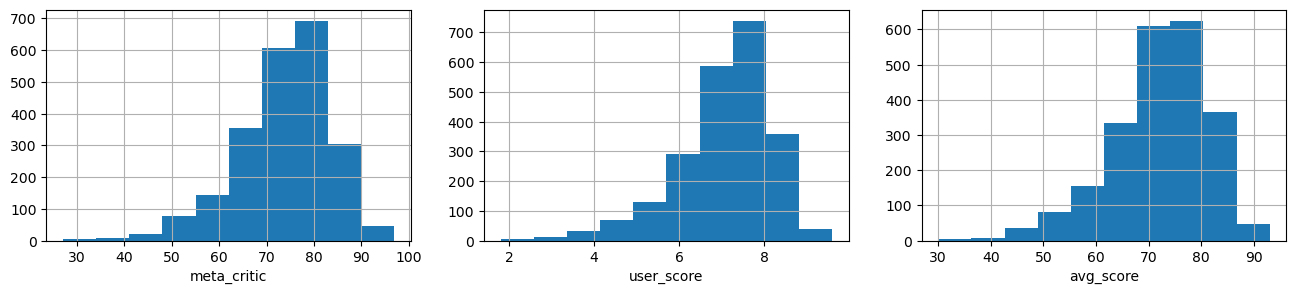

In [35]:
# critical success
success_var = ['meta_critic', 'user_score', 'avg_score']

fig, axs = plt.subplots(1, len(success_var), figsize=(16, 3))

for i, v in enumerate(success_var):
    df[v].hist(ax=axs[i])
    axs[i].set_xlabel(v)

Text(0.5, 0, 'avg_score')

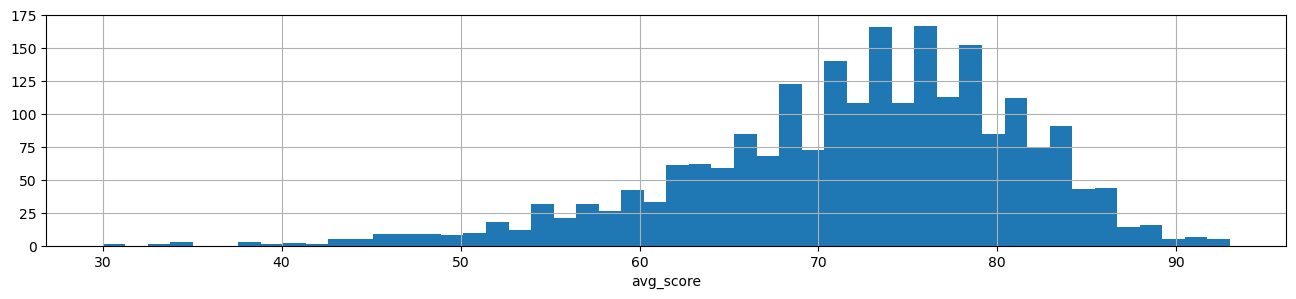

In [36]:
# launch market value
mv_var = ['msrp_price']

fig, axs = plt.subplots(1, len(mv_var), figsize=(16, 3))

df[v].hist(ax=axs, bins=50)
axs.set_xlabel(v)

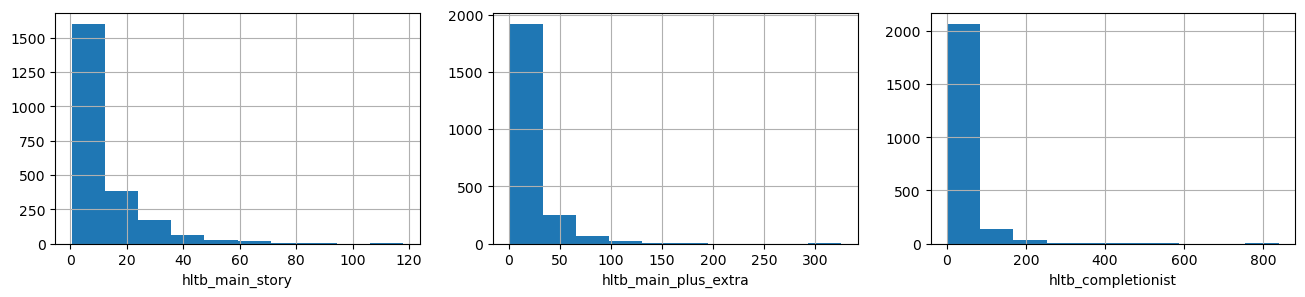

In [37]:
# player engagament
pe_var = ['hltb_main_story', 'hltb_main_plus_extra', 'hltb_completionist']

fig, axs = plt.subplots(1, 3, figsize=(16, 3))
for i, v in enumerate(pe_var):
    df[v].hist(ax=axs[i])
    axs[i].set_xlabel(v)

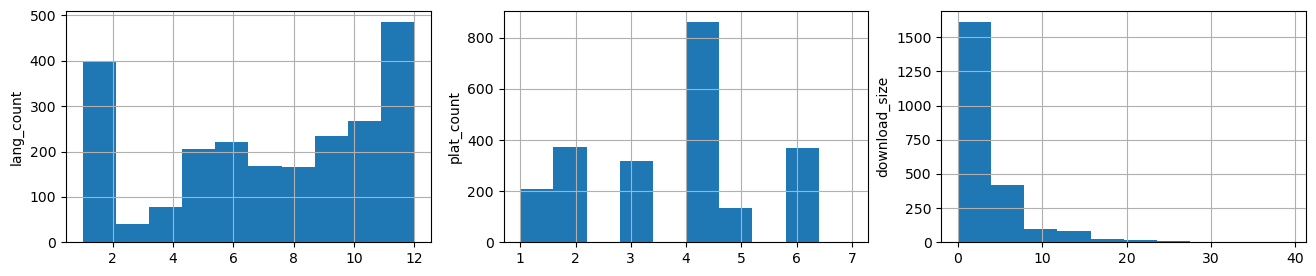

In [38]:
# other factors
of_var = ['lang_count', 'plat_count', 'download_size']

fig, axs = plt.subplots(1, len(of_var), figsize=(16, 3))
for i, v in enumerate(of_var):
    df[v].hist(ax=axs[i])
    axs[i].set_ylabel(v) 

Based on the plots, we selected the below variables for analysis.

In [39]:
### select use variables
df_use = df[['avg_score', 'msrp_price', 'hltb_main_story', 'hltb_main_plus_extra', 'hltb_completionist', 'lang_count',  'plat_count', 'switch_date', 'download_size']]
df_use.head()

,avg_score,msrp_price,hltb_main_story,hltb_main_plus_extra,hltb_completionist,lang_count,plat_count,switch_date,download_size
0,73.0,39.99,89.0,159.5,236.0,10,6,2021-05-18,13.644000
1,73.0,19.99,6.5,10.0,15.0,1,4,2019-05-07,0.168945
2,73.0,9.99,7.5,9.5,10.5,7,4,2018-09-27,0.286133
3,73.0,29.99,11.0,18.0,24.5,10,4,2018-08-28,3.189000
4,73.0,12.99,5.0,6.5,10.0,5,2,2018-08-02,0.632812


### 2. Correlation plot

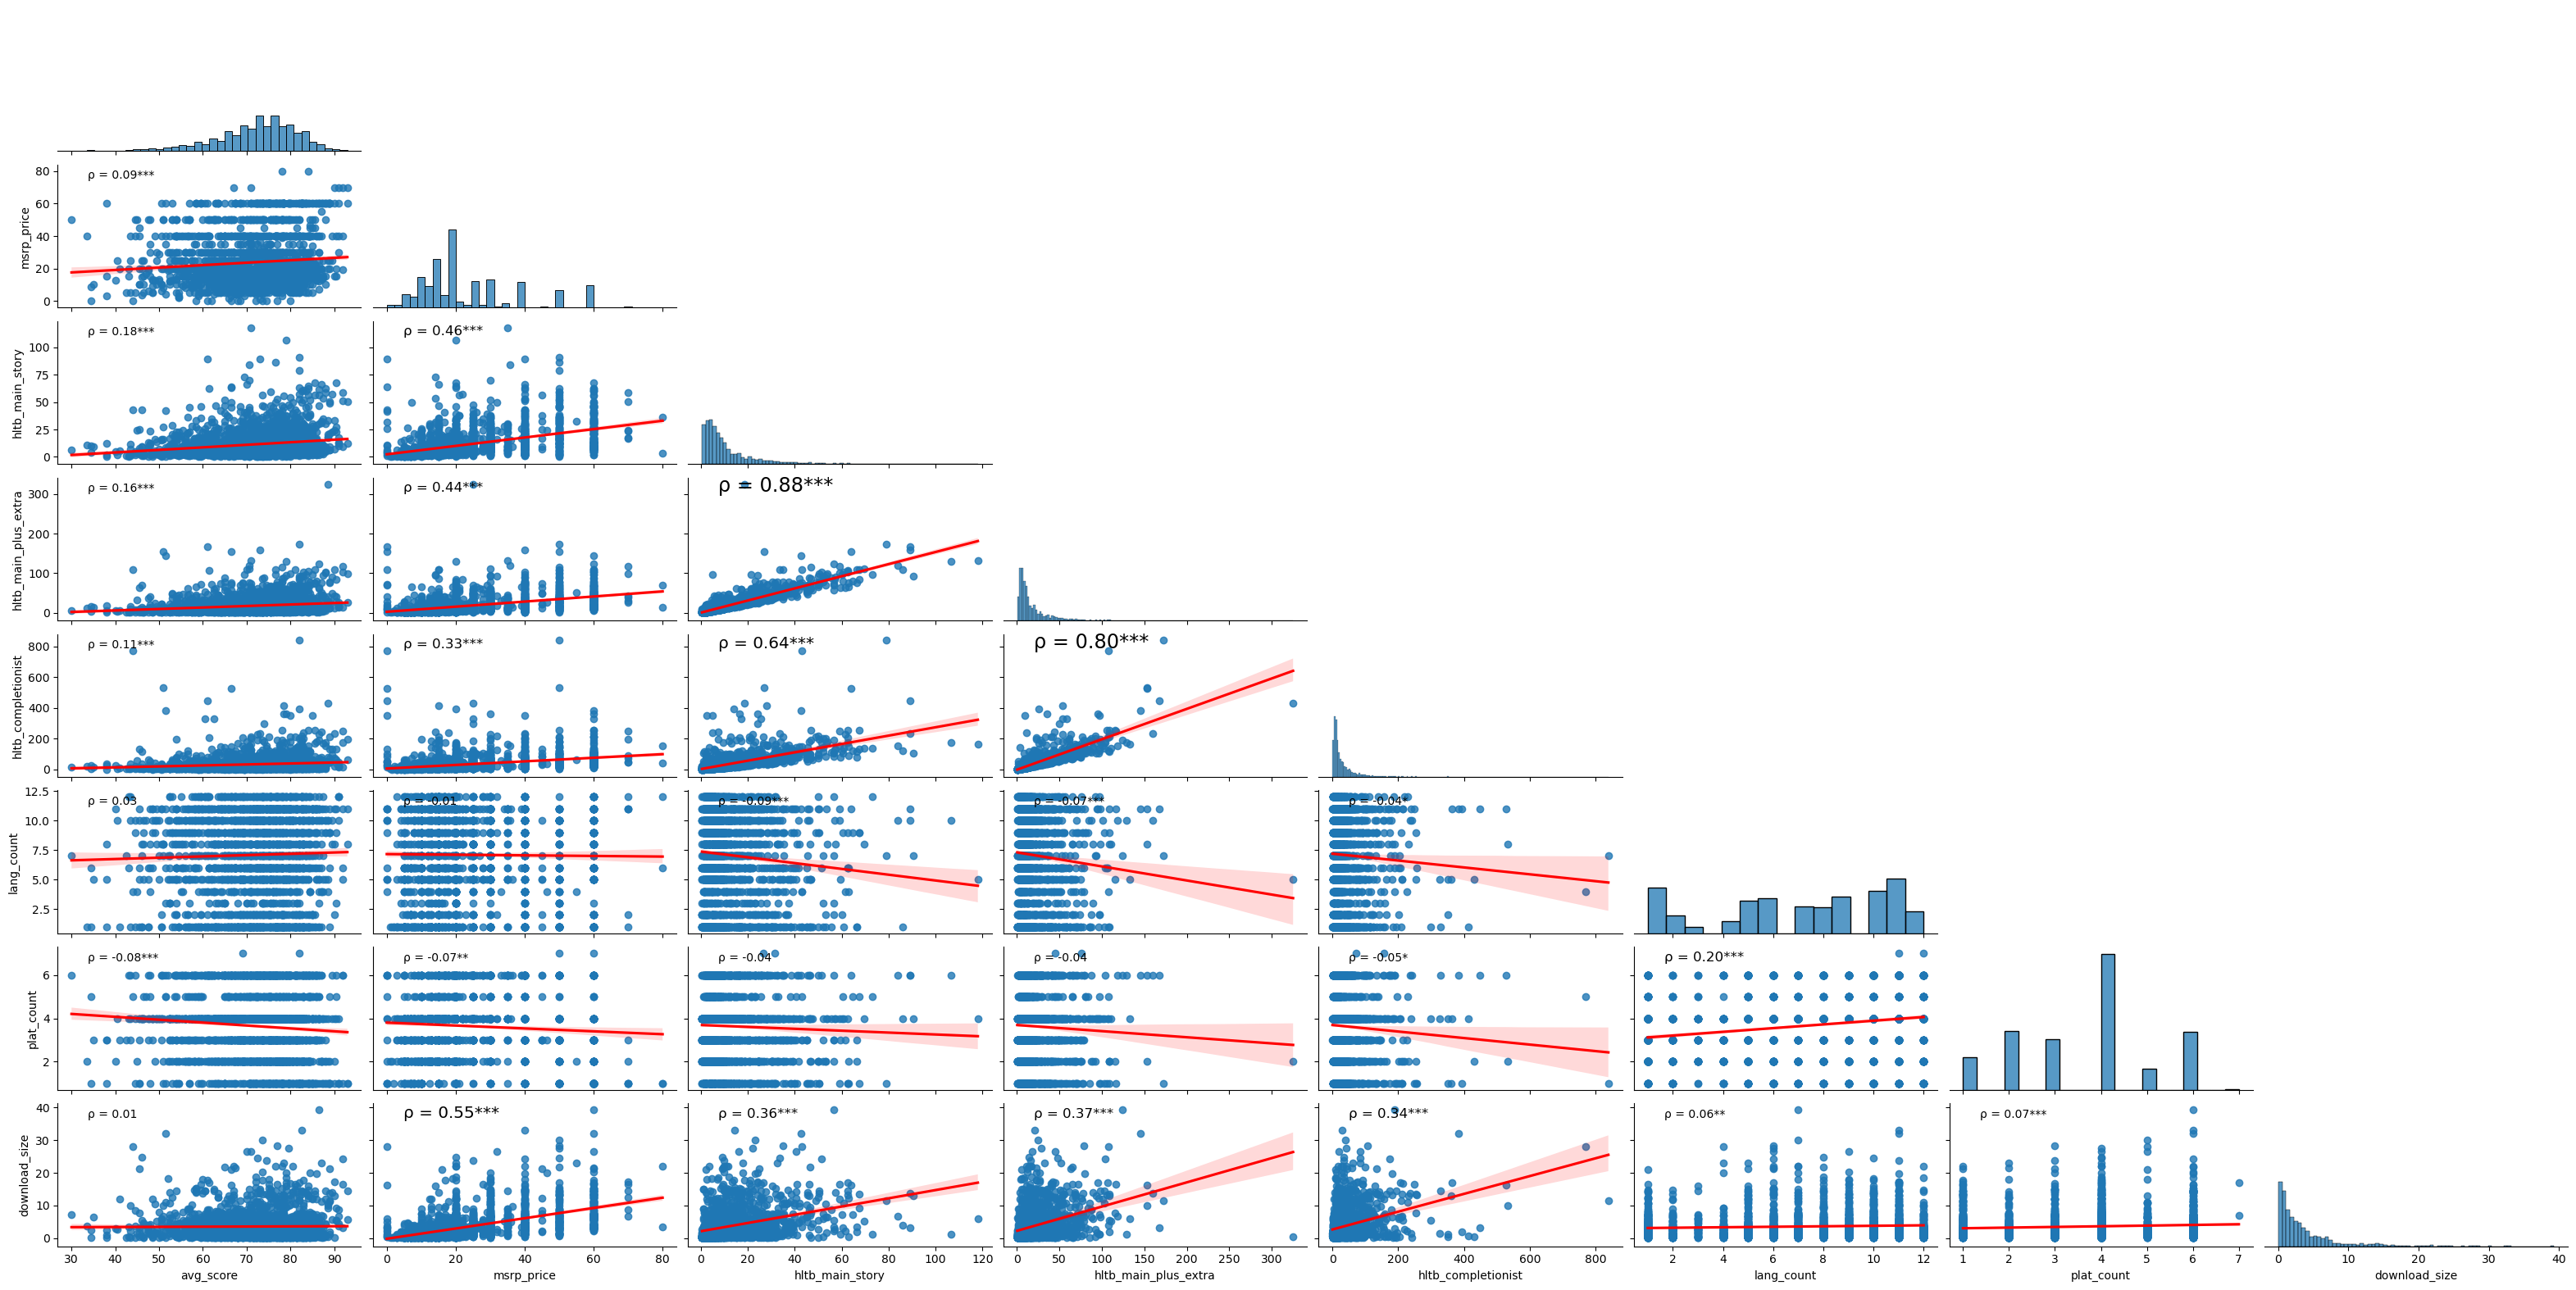

In [40]:
from scipy.stats import ttest_ind
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns

def corr_annot(x, y, ax=None, **kws):
    """Annotate a plot w/ the correlation coefficient."""
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()

    # align correlation strength with fontsize
    abs_r = abs(r)
    if abs_r < 0.2:
        font_size = "medium"
    elif abs_r < 0.5:
        font_size = "large"
    elif abs_r < 0.8:
        font_size = "x-large"
    else:
        font_size = "xx-large"
    
    # Significance stars
    if _ < 0.001:
        stars = "***"
    elif _ < 0.01:
        stars = "**"
    elif _ < 0.05:
        stars = "*"
    else:
        stars = ""

    ax.annotate(f'ρ = {r:.2f}{stars}', xy=(.1, .9), xycoords=ax.transAxes, fontsize = font_size)


g = sns.pairplot(df_use, 
                kind = "reg",
                corner = True,
                height = 2,
                aspect = 2,
                plot_kws = {
                    'line_kws':{'color':'red'},
                    #'logistic':True
                    #'lowess':True
                    });

g.map_lower(corr_annot);

- A fair positive relationship (0.55, p<0.05) is exhibited between price and download size.
- A fair positive relationship (0.46, p<0.05) is exhibited between price and the beat time of the main story.
- There is no clear relationship between price and score (0.09, p<0.05).
- There are no clear relationships between score and language counts, plaform counts (-0.08, p<0.05), and download size.

-----------------------------------------
Implications

- The size of the game can affect the selling price possibly due to the technical demands in the game development.

- A game with a longer beat time also tends to sell more expensive but we see a unimodal trend, meaning there is a optimal range of beat time that leads to higher selling price.

- Gamers seem to exhibit little interest in the number of available language, potentially because most games are available in English or language plays a weaker role in computer games. Further investigation is valueable to which is the dominant language from the games.

- Gamers seem to exhibit little interest in the number of available platform, possibly because there is a dominant platform shared by most gamers. A deeper look into which dominant platform is available for most games is valueable.



**Add title to the dataframe**

In [41]:
title_df = pd.read_csv('deku_column_id_to_title_df.csv')
title_df.columns

df = pd.merge(df, title_df, left_on='game_id', right_on='id', how='left')
df = df.drop(['level_0', 'index', 'id'], axis=1)
df

,game_id,msrp_price,switch_date,publisher,download_size,meta_critic,user_score,usk_rating,languages,platforms,hltb_main_story,hltb_main_plus_extra,hltb_completionist,avg_score,lang_count,plat_count,title
0,snowrunner,39.99,2021-05-18,Focus Entertainment,13.644000,75.0,7.1,0.0,"English, Portuguese, Spanish, French, German, ...","Nintendo Switch, PlayStation 5, PlayStation 4,...",89.0,159.5,236.0,73.0,10,6,SnowRunner
1,shakedown-hawaii,19.99,2019-05-07,Vblank Entertainment,0.168945,75.0,7.1,16.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",6.5,10.0,15.0,73.0,1,4,Shakedown: Hawaii
2,alwas-awakening,9.99,2018-09-27,Elden Pixels,0.286133,75.0,7.1,6.0,"English, French, Portuguese, Spanish, German, ...","Nintendo Switch, PlayStation 4, Xbox One, Steam",7.5,9.5,10.5,73.0,7,4,Alwa's Awakening
3,de-blob-2,29.99,2018-08-28,THQ Nordic,3.189000,75.0,7.1,6.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox One, Steam",11.0,18.0,24.5,73.0,10,4,de Blob 2
4,not-a-hero-super-snazzy-edition,12.99,2018-08-02,Devolver Digital,0.632812,75.0,7.1,16.0,"English, Spanish, French, German, Italian","Nintendo Switch, Xbox One",5.0,6.5,10.0,73.0,5,2,NOT A HERO: SUPER SNAZZY EDITION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,deadly-premonition-2-a-blessing-in-disguise,49.99,2020-07-10,Thunderful Games,5.259000,56.0,5.6,18.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, Steam",20.0,29.5,38.0,56.0,6,2,Deadly Premonition 2: A Blessing In Disguise
2260,syndrome,24.99,2022-03-11,REDDEER.GAMES,7.771000,56.0,5.1,18.0,English,"Nintendo Switch, PlayStation 4, Xbox One, Steam",8.0,13.5,16.0,53.5,1,4,Syndrome
2261,wwe-2k-battlegrounds,39.99,2020-09-18,Take-Two Interactive,10.846000,56.0,4.7,12.0,"Japanese, English, Spanish, French, German, It...","Nintendo Switch, PlayStation 4, Xbox Series X|...",8.5,9.5,15.5,51.5,9,5,WWE 2K Battlegrounds
2262,inescapable-no-rules-no-rescue,49.99,2023-10-19,Aksys Games,2.854000,56.0,3.9,18.0,English,"Nintendo Switch, PlayStation 5, PlayStation 4,...",13.0,36.0,65.0,47.5,1,6,"Inescapable: No Rules, No Rescue"


## Data analysis

### *(not shown in streamlit)* 1. Do game success (average ratings > 70) affect commercial potential (prices)?

In [42]:
import statsmodels.api as sm

df['success'] = (df['avg_score'] > 70).astype(int)

X = df[['success']]     # predictor
X = sm.add_constant(X)  # intercept
y = df['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.47
Date:                Fri, 22 Aug 2025   Prob (F-statistic):            0.00123
Time:                        15:18:35   Log-Likelihood:                -9300.1
No. Observations:                2264   AIC:                         1.860e+04
Df Residuals:                    2262   BIC:                         1.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5250      0.516     43.653      0.0

- Mean selling price differs significantly between success (ratings>70) and flop (ratings < 70) group. 
- Game products with average ratings > 70 (the success group) sells a higher mean price.
- Increasing the rating to >70 could lead to 2 times (2.09, p<0.05) higher mean selling price.

### 2. Does Game Beat Time affect Game Market Price? Is there an optimal range?

#### (Considering all games)

In [43]:
# linear estimation
X = df[['hltb_main_story']]     # predictor
X = sm.add_constant(X)  # intercept
y = df['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     609.5
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          2.32e-119
Time:                        15:18:35   Log-Likelihood:                -9035.3
No. Observations:                2264   AIC:                         1.807e+04
Df Residuals:                    2262   BIC:                         1.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.4982      0.377     

In [44]:
# nonlinear estimation
X = df[['hltb_main_story']].copy()
X['hltb_main_story_sq'] = X['hltb_main_story']**2       # quadratic terms
X = sm.add_constant(X)
y = df['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     423.8
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          4.88e-157
Time:                        15:18:35   Log-Likelihood:                -8945.0
No. Observations:                2264   AIC:                         1.790e+04
Df Residuals:                    2261   BIC:                         1.791e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.6947      0

#### **Parameter estimation: where is the sweet spot of game beat time?**

In [45]:
# Find optimal beat_time for max price
const = 13.6947
beta1 = 1.1430 #model.params['hltb_main_story']
beta2 = -0.0105 #model.params['hltb_main_story_sq']

optimal_beat_time = -beta1 / (2 * beta2)
optimal_beat_time

print(f"optimal beat time: {np.round(optimal_beat_time, 2)}", 
      f"optimal market price: {np.round(const + beta1*optimal_beat_time + beta2*optimal_beat_time**2, 2)}")      # X, y


optimal beat time: 54.43 optimal market price: 44.8


In [47]:
import plotly.graph_objects as go

# Generate smooth curve
beat_time_range = np.linspace(df['hltb_main_story'].min(), df['hltb_main_story'].max(), 100)
price_pred = const + beta1*beat_time_range + beta2*beat_time_range**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['hltb_main_story'], y=df['msrp_price'], mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=beat_time_range, y=price_pred, mode='lines', name='Fitted Curve'))
fig.add_trace(go.Scatter(x=[optimal_beat_time], y=[const + beta1*optimal_beat_time + beta2*optimal_beat_time**2],
                         mode='markers', name='Optimal', marker=dict(color='red', size=10)))

fig.update_layout(title='Game Beat Time vs Market Price',
                  xaxis_title='Game Beat Time',
                  yaxis_title='Market Price')
fig.show()

#### (considering only the success group)

In [48]:
success_gp = df[df['success'] == 1]

# nonlinear estimation
X = success_gp[['hltb_main_story']].copy()
X['hltb_main_story_sq'] = X['hltb_main_story']**2       # quadratic terms
X = sm.add_constant(X)
y = success_gp['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     313.6
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          7.41e-114
Time:                        15:20:37   Log-Likelihood:                -5736.1
No. Observations:                1450   AIC:                         1.148e+04
Df Residuals:                    1447   BIC:                         1.149e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.3381      0

#### **Parameter estimation: where is the sweet spot of game beat time?**

In [49]:
const = 13.3381
beta1 = 1.1403 
beta2 = -0.0096

optimal_beat_time = -beta1 / (2 * beta2)
print(f"optimal beat time: {np.round(optimal_beat_time, 2)}", 
      f"optimal market price: {np.round(const + beta1*optimal_beat_time + beta2*optimal_beat_time**2, 2)}")      # X, y


optimal beat time: 59.39 optimal market price: 47.2


In [50]:
import plotly.graph_objects as go

# Generate smooth curve
beat_time_range = np.linspace(success_gp['hltb_main_story'].min(), success_gp['hltb_main_story'].max(), 100)
price_pred = const + beta1*beat_time_range + beta2*beat_time_range**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=success_gp['hltb_main_story'], y=success_gp['msrp_price'], mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=beat_time_range, y=price_pred, mode='lines', name='Fitted Curve'))
fig.add_trace(go.Scatter(x=[optimal_beat_time], y=[const + beta1*optimal_beat_time + beta2*optimal_beat_time**2],
                         mode='markers', name='Optimal', marker=dict(color='red', size=10)))

fig.update_layout(title='Game Beat Time vs Market Price',
                  xaxis_title='Game Beat Time',
                  yaxis_title='Market Price')
fig.show()

### 3. Does Game Size affect market price? Is there an optimal range?

#### (considering all games)

In [51]:
# nonlinear estimation
X = df[['download_size']].copy()
X['download_size_sq'] = X['download_size']**2       # quadratic terms
X = sm.add_constant(X)
y = df['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     668.4
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          8.49e-229
Time:                        15:20:58   Log-Likelihood:                -8779.5
No. Observations:                2264   AIC:                         1.757e+04
Df Residuals:                    2261   BIC:                         1.758e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.7388      0.384  

In [52]:
# Find optimal beat_time for max price
const = 13.7388
beta1 = 3.7379 
beta2 = -0.1001 #model.params['hltb_main_story_sq']

optimal_size = -beta1 / (2 * beta2)

print(f"optimal game size: {np.round(optimal_size, 2)}", 
      f"optimal market price: {np.round(const + beta1*optimal_size + beta2*optimal_size**2, 2)}")      # X, y


optimal game size: 18.67 optimal market price: 48.63


In [53]:
import plotly.graph_objects as go

# Generate smooth curve
size_range = np.linspace(df['download_size'].min(), df['download_size'].max(), 100)
price_pred = const + beta1*size_range + beta2*size_range**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['download_size'], y=df['msrp_price'], mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=size_range, y=price_pred, mode='lines', name='Fitted Curve'))
fig.add_trace(go.Scatter(x=[optimal_size], y=[const + beta1*optimal_size + beta2*optimal_size**2],
                         mode='markers', name='Optimal', marker=dict(color='red', size=10)))

fig.update_layout(title='Market Price vs Game Size',
                  xaxis_title='Game Size',
                  yaxis_title='Market Price')
fig.show()

#### (considering only the success group)

In [54]:
success_gp = df[df['success'] == 1]

# nonlinear estimation
X = success_gp[['download_size']].copy()
X['download_size_sq'] = X['download_size']**2       # quadratic terms
X = sm.add_constant(X)
y = success_gp['msrp_price']    # response

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             msrp_price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     485.5
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          4.54e-162
Time:                        15:21:07   Log-Likelihood:                -5624.8
No. Observations:                1450   AIC:                         1.126e+04
Df Residuals:                    1447   BIC:                         1.127e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.2731      0.468  

In [55]:
# Find optimal beat_time for max price
const = 14.2731
beta1 = 3.8481 
beta2 = -0.1006

optimal_size = -beta1 / (2 * beta2)

print(f"optimal game size: {np.round(optimal_size, 2)}", 
      f"optimal market price: {np.round(const + beta1*optimal_size + beta2*optimal_size**2, 2)}")      # X, y


optimal game size: 19.13 optimal market price: 51.07


In [56]:
import plotly.graph_objects as go

# Generate smooth curve
size_range = np.linspace(success_gp['download_size'].min(), success_gp['download_size'].max(), 100)
price_pred = const + beta1*size_range + beta2*size_range**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=success_gp['download_size'], y=success_gp['msrp_price'], mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=size_range, y=price_pred, mode='lines', name='Fitted Curve'))
fig.add_trace(go.Scatter(x=[optimal_size], y=[const + beta1*optimal_size + beta2*optimal_size**2],
                         mode='markers', name='Optimal', marker=dict(color='red', size=10)))

fig.update_layout(title='Market Price vs Game Size',
                  xaxis_title='Game Size',
                  yaxis_title='Market Price')
fig.show()

## Date Output
#### The output data is used for analysis and visualization in the [Nintendo app](https://nintendo.streamlit.app/).

In [ ]:
df.to_csv('deku_dev_df.csv')